**Project 2 - Regression**

Authors: Reubén Pérez, José Aveldanes, and Xavier Durham

# Tables of Contents

### 1 - Data Pre-processing

### 2 - The Test-Train-Validation Split

### 3 - Training the Data

### 4 - Hyperperameter Tuning 

### 5 - Test Set

### 6 - Cross Validation

### Dependencies:

In [83]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

## The Data: Diabetes with Population Info by County

In [10]:
# Create a list of column names found in db.info 

db=pd.read_csv('/Users/joseaveldanes/Documents/GitHub/CSS_Project_2_Team_4_Fall_2020/Data/Diabetes.csv')
db.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


# 1. Data Pre-processing

First, Let's make a copy of the Data

In [11]:
db2 = db.copy()

In [12]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

Now, we have to deal with missing data in the objects before we can move on to visualization so:

In [13]:
 for category in ["Diabetes_Number", "Obesity_Number", "Physical_Inactivity_Number"]:
    replacement = np.nan
    for i in range(len(db2.loc[:,category])):
        try:
            db2.loc[i,category] = int(db2.loc[i,category])
        except:
            print(i, db2.loc[i,category])
            db2.loc[i,category] = replacement

2751 Suppressed
2311 No Data
2312 No Data
2313 No Data
2314 No Data
2315 No Data
2316 No Data
2317 No Data
2318 No Data
2319 No Data
2320 No Data
2321 No Data
2322 No Data
2323 No Data
2324 No Data
2325 No Data
2326 No Data
2327 No Data
2328 No Data
2329 No Data
2330 No Data
2331 No Data
2332 No Data
2333 No Data
2334 No Data
2335 No Data
2336 No Data
2337 No Data
2338 No Data
2339 No Data
2340 No Data
2341 No Data
2342 No Data
2343 No Data
2344 No Data
2345 No Data
2346 No Data
2347 No Data
2348 No Data
2349 No Data
2350 No Data
2351 No Data
2352 No Data
2353 No Data
2354 No Data
2355 No Data
2356 No Data
2357 No Data
2358 No Data
2359 No Data
2360 No Data
2361 No Data
2362 No Data
2363 No Data
2364 No Data
2365 No Data
2366 No Data
2367 No Data
2368 No Data
2369 No Data
2370 No Data
2371 No Data
2372 No Data
2373 No Data
2374 No Data
2375 No Data
2376 No Data
2377 No Data
2378 No Data
2379 No Data
2380 No Data
2381 No Data
2382 No Data
2383 No Data
2384 No Data
2385 No Data
2386 No D

Here we replace NaN with 0 so that Python can interpret this correctly

In [14]:
db2=db2.replace(np.nan,0)

Now that we have dealt with the NaN we can move on to converting our columns into integers for analysis

In [15]:
 db2.iloc[:,2:5] = db2.iloc[:,2:5].astype(int)

In [16]:
db2.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                       int64
Obesity_Number                                                                        int64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

Finally, we are going to take a quick glance at our columns (or features) and drop the ones that we will not use in the analysis

In [17]:
#First, let's take a look at our columns
columns = db2.columns

#Print
columns


Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_1',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
     

Drop Features/Columns that I want for analysis

In [18]:
#Drop columns that we don't need 
cols = [0,1,6,61,62,63,64,67,81,82,83,84,85,86,87,88,89,90,91,92,93,94] 
db2.drop(db2.columns[cols],axis=1,inplace=True)

## 1.1 Visualizations

Now let's do some visualization with some feartures of interest

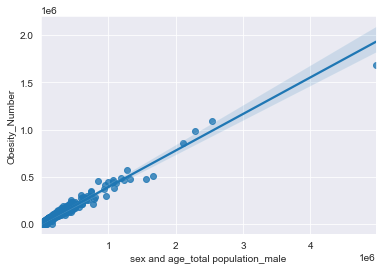

In [19]:
#Regression Plot: Gender (men) and Obesity Number
sns.regplot(x='sex and age_total population_male', y='Obesity_Number', data=db2)

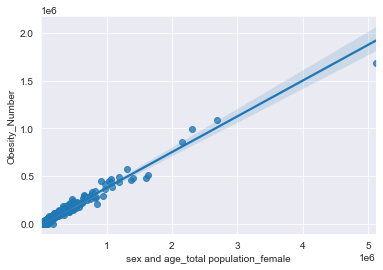

In [20]:
#Regression Plot: Gender (women) and Obesity Number
sns.regplot(x='sex and age_total population_female', y='Obesity_Number', data=db2)

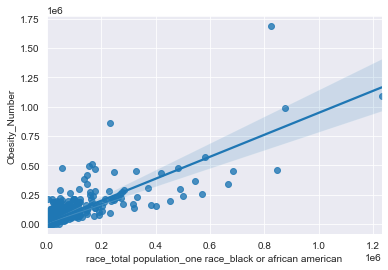

In [21]:
#Regression Plot: Race (Black) and Obesity Number
sns.regplot(x='race_total population_one race_black or african american', y='Obesity_Number', data=db2)

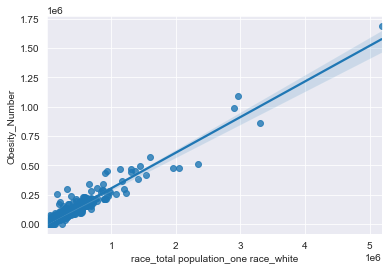

In [22]:
#Regression Plot: Race (white) and Obesity Number
sns.regplot(x='race_total population_one race_white', y='Obesity_Number', data=db2)

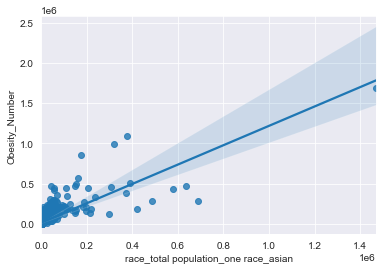

In [23]:
#Regression Plot: Race (Asian) and Obesity Number
sns.regplot(x='race_total population_one race_asian', y='Obesity_Number', data=db2)

Text(0.5, 1.0, 'Histogram of Obesity Number and Diabetes Number')

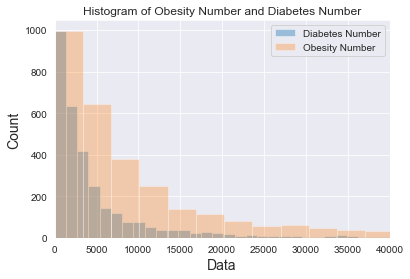

In [24]:
# Method 1: on the same Axis
plt.xlim(0, 40000)
plt.hist( db2["Diabetes_Number"] , bins=500, label="Diabetes Number", alpha =.4)
plt.hist( db2["Obesity_Number"] , bins=500, label="Obesity Number", alpha =.3)
plt.legend(loc= 'best')
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Histogram of Obesity Number and Diabetes Number")

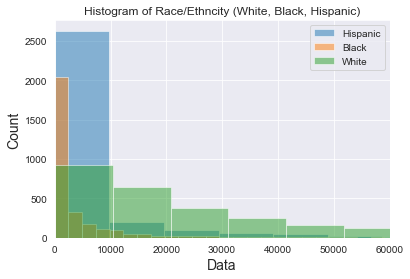

In [25]:
# Method 1: on the same Axis
plt.xlim(0, 60000)
plt.hist( db2['hispanic or latino and race_total population_hispanic or latino (of any race)'] , bins=500, label= 'Hispanic', alpha =.5)
plt.hist( db2['race_total population_one race_black or african american'] , bins=500, label='Black', alpha =.5)
plt.hist( db2['race_total population_one race_white'] , bins=500, label='White', alpha =.5)
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Histogram of Race/Ethncity (White, Black, Hispanic)")
plt.legend(loc= 'best')


## 1.2 Create a 'Diabetes_Proportion' Column

In [26]:
db2['Diabetes_Proportion'] = db2['Diabetes_Number']/db2['race_total population']


In [27]:
db2[['Diabetes_Proportion']]

,Diabetes_Proportion
0,0.093804
1,0.080281
2,0.131875
3,0.105251
4,0.108977
...,...
3215,0.058028
3216,0.019038
3217,0.069872
3218,0.078361


Next we want to move the 'Diabetes_Proportion' column to the front of the dataframe

In [28]:
col_name="Diabetes_Proportion"
first_col = db2.pop(col_name)
db2.insert(2, col_name, first_col)

In [29]:
db2

,CountyFIPS,Diabetes_Number,Diabetes_Proportion,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over
0,1001,5178,0.093804,13489,12525,55200,54170,1030,54170,42437,...,3855,3337,7064,7374,7853,4131,2694,4711,2524,815
1,1003,16707,0.080281,48542,40024,208107,204535,3572,204535,179526,...,12707,10790,23326,25377,28330,14440,14851,24551,12165,3949
2,1005,3400,0.131875,8009,5431,25782,25429,353,25429,12216,...,1434,1658,3675,3104,3452,1657,1651,2820,1392,422
3,1007,2371,0.105251,6534,5827,22527,22340,187,22340,17268,...,1514,1491,3075,2895,3439,1494,1216,2122,1112,427
4,1009,6282,0.108977,14227,14365,57645,56710,935,56710,55054,...,3717,3189,6786,7153,7947,3895,3613,6132,3235,866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,56037,2560,0.058028,9362,7518,44117,43226,891,43226,41084,...,3157,2716,6551,6022,5274,3089,2676,3061,1215,445
3216,56039,439,0.019038,2051,2005,23059,22875,184,22875,20832,...,930,1097,4239,3733,3051,1485,1521,2087,764,284
3217,56041,1440,0.069872,4925,3519,20609,19891,718,19891,19252,...,1477,1139,2454,2698,2335,1762,1168,1605,606,287
3218,56043,637,0.078361,1738,1708,8129,7791,338,7791,7293,...,580,408,783,984,1021,581,607,967,528,191


# 2. The Test-Train-Validation Split 

So what we want to do is look at the features we'll be using for prediction

In [30]:
#Feature used to predict diabetes_proportion
X = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number'], axis = 1)

#Proportion of diabetes by county 
y = db2['Diabetes_Proportion']

In [31]:
#set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)


## 2.1 The Validation Set

In [32]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

# 3. Train Models

## 3.1 Linear Regression (OLS)

In [33]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)


# Basic Logic of OLS Regression, Pros/Cons, Plausibility 
In a basic, sense OLS makes sense for the number of counties with highest counts of people with diabetes because it invovles a continous variable. 
Ideally, you want to find parameters that minimize the error term. Your end goal here is to basically find a line that fits your data points. The appealing part of OLS  is that it is quite robust and that coefficients are unbiased estimators of alpha (the constant) and beta (the effect of each individual independent variable to the dependent variable). This method is plausible under the assumption that there is no multicollinearity between the independent variables in our limited dataset. 
OLS is also nice because it is generally easy to interpret. The cons of using it are that it can easily overfit models. If the number of observations (n) are equal to the number of predictors (p) then overfits can result in low accuracy on test data sets. 


In [34]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 3.48934303e-08  9.96358935e-07 -1.22041766e-07 -1.38593189e-07
  4.38885739e-06 -1.38593189e-07 -1.21486614e-06  6.46261345e-06
  7.21868207e-06  2.68430093e-06  6.89629218e-08  1.02907747e-06
  9.72616146e-07  5.16462820e-06  1.98818846e-05  1.88969815e-05
  1.93288346e-05  2.23501819e-05  1.96937052e-05  2.29616063e-05
  1.97425506e-05  5.88132893e-07  2.41387949e-06 -7.15842917e-06
  3.51377658e-06 -1.24504177e-06  1.41239249e-05  4.38885739e-06
 -5.40954142e-06 -9.00144060e-06 -2.36172002e-06 -3.83796390e-06
 -1.22041766e-07  3.55017116e-06 -3.22760751e-06 -3.27372787e-06
 -7.31122809e-06 -8.58668029e-06 -1.16305878e-05 -1.22041766e-07
  9.49496723e-09  2.22386952e-08  1.66084160e-07 -3.19072818e-06
 -1.51603231e-07 -2.27043016e-07  1.02578963e-07 -6.24347010e-07
 -1.58230941e-06 -1.51517720e-05  1.47331574e-05 -3.28732864e-06
  4.61035117e-07  2.46455817e-05  4.41811697e-07 -3.67826910e-07
 -3.82029525e-08 -4.35626921e-07 -3.67322957e-06 -2.24784639e-06
 -2.91882873e-07 -3.13487

Now we are going to visualize the coefficents

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.000001
Feature: 2, Score: -0.000000
Feature: 3, Score: -0.000000
Feature: 4, Score: 0.000004
Feature: 5, Score: -0.000000
Feature: 6, Score: -0.000001
Feature: 7, Score: 0.000006
Feature: 8, Score: 0.000007
Feature: 9, Score: 0.000003
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000001
Feature: 12, Score: 0.000001
Feature: 13, Score: 0.000005
Feature: 14, Score: 0.000020
Feature: 15, Score: 0.000019
Feature: 16, Score: 0.000019
Feature: 17, Score: 0.000022
Feature: 18, Score: 0.000020
Feature: 19, Score: 0.000023
Feature: 20, Score: 0.000020
Feature: 21, Score: 0.000001
Feature: 22, Score: 0.000002
Feature: 23, Score: -0.000007
Feature: 24, Score: 0.000004
Feature: 25, Score: -0.000001
Feature: 26, Score: 0.000014
Feature: 27, Score: 0.000004
Feature: 28, Score: -0.000005
Feature: 29, Score: -0.000009
Feature: 30, Score: -0.000002
Feature: 31, Score: -0.000004
Feature: 32, Score: -0.000000
Feature: 33, Score: 0.000004
Feature: 34, 

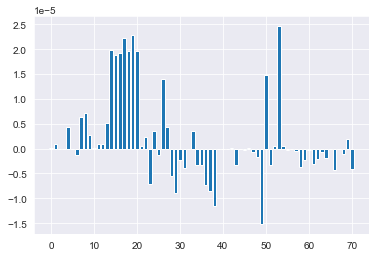

In [35]:
# get fearture importance
importance_ols = lin_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ols):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ols))], importance_ols)
plt.show()

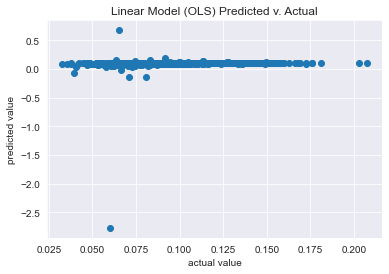

In [36]:
# predict the diabetes number
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

Finally, we are going to calculate the **root means squared error** to get the average difference between the predicted and the actual values

In [37]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [38]:
rmse(lin_pred, y_validate)

0.11773747122326604

## 3.2 Ridge Regression

Now that we got the RMSE for OLS, we're going to do the same for Ridge Regression

In [39]:
# make and fit a Ridge regression model
ridge_reg = Ridge()
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']


# Ridge Regression logic, Pros/Cons, Plausability 

The big pro of ridge regression is that these models deal really well with multicollinearity, an assumption that is assumed for OLS models. It is particularly useful when you have small observations (p) or when you have more n (variables) than p (observations). What is nice about Ridge Regression is that while it is strikingly similar to OLS, it introduces bias to the model. In this context, we label that bias as lambda which penalizes the model and then we use cross validation to see which results in the lowest amount of variance. The disadvantage of ridge regression is that it trades variance for bias. There's a dimensionality reduction that happens with this model that could result in bad fits for test data. 

In [40]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 3.48934303e-08  9.96358935e-07 -1.22041766e-07 -1.38593189e-07
  4.38885739e-06 -1.38593189e-07 -1.21486614e-06  6.46261345e-06
  7.21868207e-06  2.68430093e-06  6.89629218e-08  1.02907747e-06
  9.72616146e-07  5.16462820e-06  1.98818846e-05  1.88969815e-05
  1.93288346e-05  2.23501819e-05  1.96937052e-05  2.29616063e-05
  1.97425506e-05  5.88132893e-07  2.41387949e-06 -7.15842917e-06
  3.51377658e-06 -1.24504177e-06  1.41239249e-05  4.38885739e-06
 -5.40954142e-06 -9.00144060e-06 -2.36172002e-06 -3.83796390e-06
 -1.22041766e-07  3.55017116e-06 -3.22760751e-06 -3.27372787e-06
 -7.31122809e-06 -8.58668029e-06 -1.16305878e-05 -1.22041766e-07
  9.49496723e-09  2.22386952e-08  1.66084160e-07 -3.19072818e-06
 -1.51603231e-07 -2.27043016e-07  1.02578963e-07 -6.24347010e-07
 -1.58230941e-06 -1.51517720e-05  1.47331574e-05 -3.28732864e-06
  4.61035117e-07  2.46455817e-05  4.41811697e-07 -3.67826910e-07
 -3.82029525e-08 -4.35626921e-07 -3.67322957e-06 -2.24784639e-06
 -2.91882873e-07 -3.13487

#
Now, we are going to plot the coefficients for the Ridge 

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.000001
Feature: 2, Score: 0.000001
Feature: 3, Score: 0.000001
Feature: 4, Score: 0.000001
Feature: 5, Score: 0.000001
Feature: 6, Score: -0.000010
Feature: 7, Score: -0.000002
Feature: 8, Score: -0.000001
Feature: 9, Score: 0.000003
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000001
Feature: 12, Score: 0.000001
Feature: 13, Score: 0.000015
Feature: 14, Score: 0.000002
Feature: 15, Score: 0.000001
Feature: 16, Score: 0.000001
Feature: 17, Score: 0.000004
Feature: 18, Score: 0.000001
Feature: 19, Score: 0.000005
Feature: 20, Score: 0.000001
Feature: 21, Score: -0.000007
Feature: 22, Score: 0.000001
Feature: 23, Score: -0.000008
Feature: 24, Score: 0.000002
Feature: 25, Score: -0.000002
Feature: 26, Score: 0.000006
Feature: 27, Score: 0.000001
Feature: 28, Score: -0.000005
Feature: 29, Score: -0.000009
Feature: 30, Score: -0.000002
Feature: 31, Score: -0.000004
Feature: 32, Score: 0.000001
Feature: 33, Score: 0.000004
Feature: 34, S

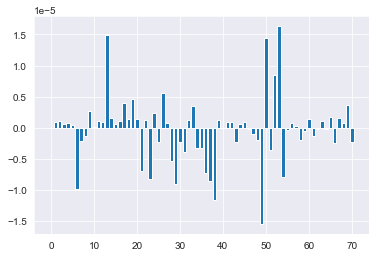

In [41]:
# get feature importance
importance_ridge = ridge_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ridge):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ridge))], importance_ridge)
plt.show()

Now we are going to use the Ridge model to make predictions and visualize the predictions against the actual values.

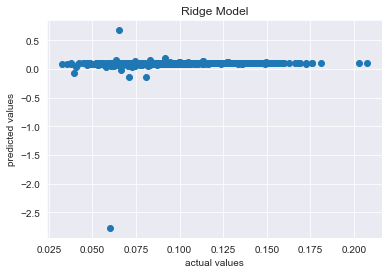

In [42]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [43]:
# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)

0.11773746840171095

## 3.3 LASSO Regression

Now we'll try LASSO to compare its RMSE value to Ridge and Regression

In [44]:
# create and fit the model
lasso_reg = Lasso(tol=.2)

lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']



# Lasso logic, pros/cons, plausibility 

Lasso regression is quite similar in logic to ridge regression albeit different in that we multiply lambda by the absolute value of the slope to get the regression penalty. In the textbook, we learned that this results in shrinking the size of the coefficients to zero. The reason why it is plausible here is because in a dataset with lots of variables that are potentially unrelated to the model but ran with the model nonetheless, we can drop variables that do not contribute to our understanding of the relationship between x and y. In other words, this type of regression reduces variance particularly in models that have lots of features (independent variables) that are not useful/related to the outcome.

Plot the coefficients for Ridge and Lasso

Feature: 0, Score: 0.0000000420
Feature: 1, Score: 0.0000006051
Feature: 2, Score: -0.0000002102
Feature: 3, Score: -0.0000000000
Feature: 4, Score: -0.0000000000
Feature: 5, Score: -0.0000000000
Feature: 6, Score: -0.0000000292
Feature: 7, Score: 0.0000000000
Feature: 8, Score: 0.0000000000
Feature: 9, Score: 0.0000000000
Feature: 10, Score: -0.0000000000
Feature: 11, Score: 0.0000002704
Feature: 12, Score: -0.0000000000
Feature: 13, Score: -0.0000000000
Feature: 14, Score: -0.0000000000
Feature: 15, Score: -0.0000001304
Feature: 16, Score: 0.0000000000
Feature: 17, Score: 0.0000000000
Feature: 18, Score: 0.0000000000
Feature: 19, Score: 0.0000016364
Feature: 20, Score: -0.0000000495
Feature: 21, Score: 0.0000000000
Feature: 22, Score: -0.0000000000
Feature: 23, Score: 0.0000000000
Feature: 24, Score: 0.0000000000
Feature: 25, Score: 0.0000000000
Feature: 26, Score: 0.0000000226
Feature: 27, Score: -0.0000000000
Feature: 28, Score: 0.0000000000
Feature: 29, Score: -0.0000000000
Featur

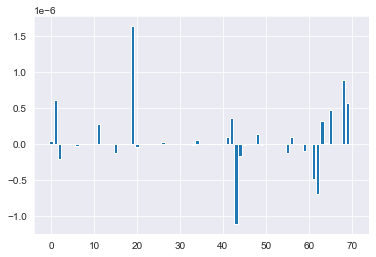

In [45]:
# get feature importance
importance_lasso = lasso_model.coef_
# summarize feature importance
for i,v in enumerate(importance_lasso):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_lasso))], importance_lasso)
plt.show()

Now we're going to use the LASSO model to make predictions and visualize the predictions against the actual values. 

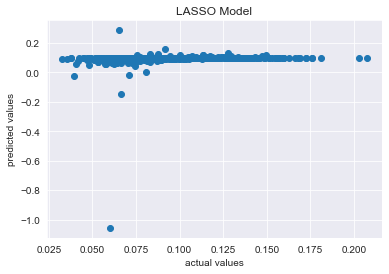

In [46]:

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [47]:
#calculate the rmse for the Ridge model
rmse(lasso_pred, y_validate)

0.05278393031705666

## 3.4 Elastic - Net

In [48]:
# create and fit the model
ElasNet_reg = ElasticNet(tol=.5)
ElasNet_model = ElasNet_reg.fit(X_train, y_train)
ElasNet_reg_data = pd.DataFrame([ElasNet_model.coef_, X.columns]).T
ElasNet_reg_data.columns = ['Coefficient', 'Feature']


# Elastic Net logic, pros/cons, plausibility 
Elastic Net Regression is a combination of both lasso and ridge regression methods. Elastic net both groups and shrinks the parameters associated with the outcome and either leaves them in the model or removes them simultaneously. The pros of the elastic net model is that it has a penalty that aids in generating a sparse model and a second penalty that helps overcome strict choosing of features. It also tends to handle correlated features as groups. 

Feature: 0, Score: 0.0000000338
Feature: 1, Score: -0.0000000867
Feature: 2, Score: -0.0000000064
Feature: 3, Score: -0.0000000000
Feature: 4, Score: 0.0000000000
Feature: 5, Score: -0.0000000000
Feature: 6, Score: -0.0000000044
Feature: 7, Score: 0.0000000450
Feature: 8, Score: 0.0000000618
Feature: 9, Score: 0.0000008994
Feature: 10, Score: -0.0000000000
Feature: 11, Score: 0.0000003481
Feature: 12, Score: -0.0000000000
Feature: 13, Score: -0.0000000355
Feature: 14, Score: -0.0000001103
Feature: 15, Score: -0.0000000217
Feature: 16, Score: 0.0000002741
Feature: 17, Score: -0.0000000000
Feature: 18, Score: -0.0000006553
Feature: 19, Score: 0.0000003287
Feature: 20, Score: -0.0000003449
Feature: 21, Score: 0.0000000000
Feature: 22, Score: 0.0000000000
Feature: 23, Score: 0.0000000000
Feature: 24, Score: 0.0000000000
Feature: 25, Score: 0.0000000000
Feature: 26, Score: 0.0000000631
Feature: 27, Score: -0.0000000948
Feature: 28, Score: 0.0000000000
Feature: 29, Score: -0.0000003262
Featu

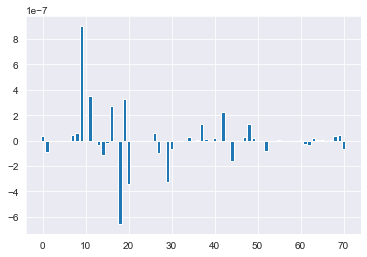

In [49]:
# get feature importance
importance_ElasNet = ElasNet_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ElasNet):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ElasNet))], importance_ElasNet)
plt.show()

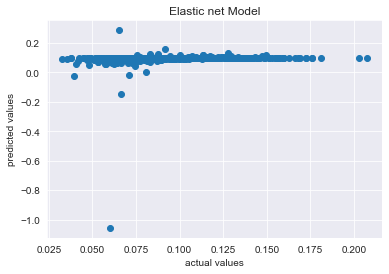

In [50]:
# use the model to make predictions
ElasNet_pred = ElasNet_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('Elastic net Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [51]:
#calculate the rmse for the Ridge model
rmse(ElasNet_pred, y_validate)

0.028597921493711664

## 3.5 Random Forest

In [52]:
# create and fit the model
RandomF_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RandomF_model = RandomF_reg.fit(X_train, y_train)

# Random Forest Logic, Pros/Cons, Plausibility

This is an ensemble method that we haven't covered in class but we felt we had limited options for choosing a fifth model. We felt that we couldn't compare RMSEs across model if we reverted to using a logit model as our last and fifth model. Our understanding of the model is that the model creates a series of decision trees that run paralell to each other and (in the regression context) puts out the mean average regression of the individual trees. 

The big pros to random forest is that this model tends to run well on large databases , can give estimates of what variables are important for the mean average regression, and it seems to also effectively have a method for estimating missing data. We were a little less sure about our justification for using this model. One of the big cons of using Random Forest Trees is that they are pretty sensitive to the data on which they are trained. These decision tress can also be quite expensive to train. 

In [53]:
# Build a forest and compute the impurity-based feature importances
importances = RandomF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.132831)
2. feature 30 (0.077929)
3. feature 36 (0.072291)
4. feature 1 (0.061017)
5. feature 0 (0.033812)
6. feature 34 (0.032425)
7. feature 69 (0.026330)
8. feature 44 (0.020589)
9. feature 20 (0.020491)
10. feature 15 (0.019108)
11. feature 41 (0.018650)
12. feature 40 (0.018291)
13. feature 70 (0.016818)
14. feature 46 (0.015878)
15. feature 9 (0.015829)
16. feature 47 (0.013802)
17. feature 18 (0.013562)
18. feature 13 (0.013167)
19. feature 58 (0.013144)
20. feature 49 (0.013135)
21. feature 59 (0.013084)
22. feature 42 (0.012841)
23. feature 68 (0.012821)
24. feature 17 (0.011706)
25. feature 62 (0.011615)
26. feature 29 (0.011481)
27. feature 28 (0.011479)
28. feature 38 (0.011081)
29. feature 61 (0.010657)
30. feature 8 (0.010238)
31. feature 26 (0.010189)
32. feature 48 (0.010088)
33. feature 60 (0.009936)
34. feature 35 (0.009648)
35. feature 16 (0.009421)
36. feature 64 (0.009287)
37. feature 66 (0.009153)
38. feature 37 (0.008813)
39. featu

In [90]:
X.iloc[:,0:5]

,CountyFIPS,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races
0,1001,12525,55200,54170,1030
1,1003,40024,208107,204535,3572
2,1005,5431,25782,25429,353
3,1007,5827,22527,22340,187
4,1009,14365,57645,56710,935
...,...,...,...,...,...
3215,56037,7518,44117,43226,891
3216,56039,2005,23059,22875,184
3217,56041,3519,20609,19891,718
3218,56043,1708,8129,7791,338


Plot Feature Importance

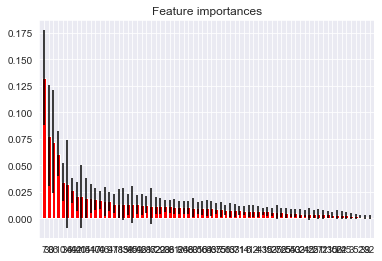

In [54]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

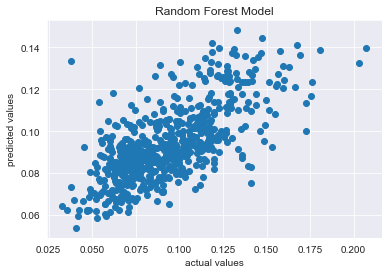

In [55]:
# use the model to make predictions
RandomF_pred = RandomF_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, RandomF_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [56]:
#calculate the rmse for the Random Forest model
rmse(RandomF_pred, y_validate)

0.020170120240613244

# 4. Hyperparameter Tuning (OLS, Ridge, LASSO, Elastic Net)

Hyperparameter tuning for OLS

In [57]:
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: -1.53365658767921
Validation R^2: -16.877525469014383
Validation RMSE 0.11773747122326604


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Hyperparameter tuning for Ridge

In [58]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'lsqr'}
Best CV R^2: 0.07206778477901021
Validation R^2: -0.24308830651034197
Validation RMSE 0.031046453115562846


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Hyperparameter tuning for lasso

In [59]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0026781316162793147
Validation R^2: -0.001017233533549211
Validation RMSE 0.027860042732923886


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Hyperparameter tuning for Elastic Net

In [60]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

ElasNet_grid_reg = GridSearchCV(ElasNet_reg, param_grid, cv=3, iid=False)
ElasNet_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ElasNet_grid_reg.cv_results_["mean_test_score"])
best_ElasNet_pred = ElasNet_grid_reg.best_estimator_.predict(X_validate)

print(ElasNet_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ElasNet_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ElasNet_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ElasNet_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0026781316162793147
Validation R^2: -0.001017233533549211
Validation RMSE 0.027860042732923886


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Hyperperamter Tuning for Random Forest

In [61]:
param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'max_features': 'auto'}
Best CV R^2: 0.3898733352879417
Validation R^2: 0.4753194413408446
Validation RMSE 0.020170120240613244


# 5. Test Set Using Random Forest

In [62]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.013
sfm = SelectFromModel(RandomF_reg, threshold=0.013)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=71,
                                                random_state=10),
                threshold=0.013)

In [63]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
X_important_validate = sfm.transform(X_validate)

In [64]:
# create a random forest regressor using only important features 
RF_important_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RF_important_model = RF_important_reg.fit(X_important_train, y_train)

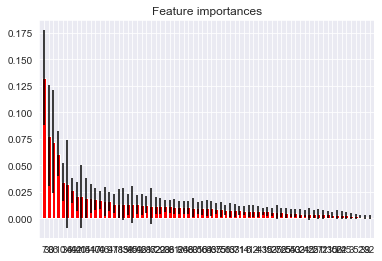

In [65]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

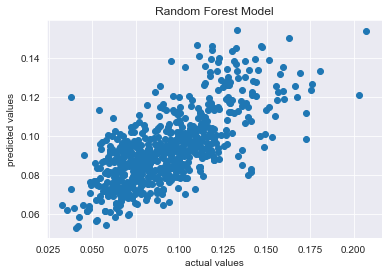

In [66]:
# use the model to make predictions using important features
RF_important_pred = RF_important_model.predict(X_important_validate)

# plot the predictions
plt.scatter(y_validate, RF_important_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [67]:
#calculate the rmse for the Random Forest model
rmse(RF_important_pred, y_validate)

0.019891088921405828

In [85]:
#Hyperparameter tuning with important features 

param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_important_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_important_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_important_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'max_features': 'auto'}
Best CV R^2: 0.40168911345452757
Validation R^2: 0.48973578092160963
Validation RMSE 0.019891088921405828


In [69]:
# make predictions for the test set using Random Forest Model
final_pred = RandomF_grid_reg.predict(X_important_test)
# calculate the rmse for the final predictions
print('Test set rmse: ', rmse(final_pred, y_test))

Test set rmse:  0.023721490004420615


# 6. Cross Validation

First, we need to binarize the "Diabetes Proportion" column to perform CV and to plot a confusion matrix

In [70]:
desc = db2["Diabetes_Proportion"].describe() 
desc

count    3220.000000
mean        0.093783
std         0.028551
min         0.000000
25%         0.072570
50%         0.090205
75%         0.112038
max         0.224208
Name: Diabetes_Proportion, dtype: float64

We see that .112038 makes up 75% of the distribution. Therefore, we can take all the counties above this threshold and label them as 1 and the ones below this threshold as 0

In [71]:
conditions = [
    (db2['Diabetes_Proportion'] >= 0.112038),
    (db2['Diabetes_Proportion'] < 0.112038),
    ]
values = ['1', '0']
db2['Diabetes_Binarizer'] = np.select(conditions,values)

db2.head()

,CountyFIPS,Diabetes_Number,Diabetes_Proportion,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,Diabetes_Binarizer
0,1001,5178,0.093804,13489,12525,55200,54170,1030,54170,42437,...,3337,7064,7374,7853,4131,2694,4711,2524,815,0
1,1003,16707,0.080281,48542,40024,208107,204535,3572,204535,179526,...,10790,23326,25377,28330,14440,14851,24551,12165,3949,0
2,1005,3400,0.131875,8009,5431,25782,25429,353,25429,12216,...,1658,3675,3104,3452,1657,1651,2820,1392,422,1
3,1007,2371,0.105251,6534,5827,22527,22340,187,22340,17268,...,1491,3075,2895,3439,1494,1216,2122,1112,427,0
4,1009,6282,0.108977,14227,14365,57645,56710,935,56710,55054,...,3189,6786,7153,7947,3895,3613,6132,3235,866,0


In [72]:
#Feature used to predict diabetes_Binarizer
X2 = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number', 'Diabetes_Binarizer'], axis = 1)

#Proportion of diabetes by county 
y2 = db2['Diabetes_Binarizer']


Now we will create a new set of training, validation and test sets to do cross validation since we are changing "Y" to "Diabetes_Binarizer" 

In [73]:
# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X2_train, X2_test, y2_train, y2_test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                    train_size=0.80, test_size=0.20)

Validation Set

In [74]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2_train, y2_train,
                                                    train_size=0.75, test_size=0.25)

Now let's create and fit the model

In [75]:
# create and fit the model
RF_reg = RandomForestClassifier(n_estimators= 71, random_state = 10)
RF_model = RF_reg.fit(X2_train, y2_train)

Now, I want to create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.013

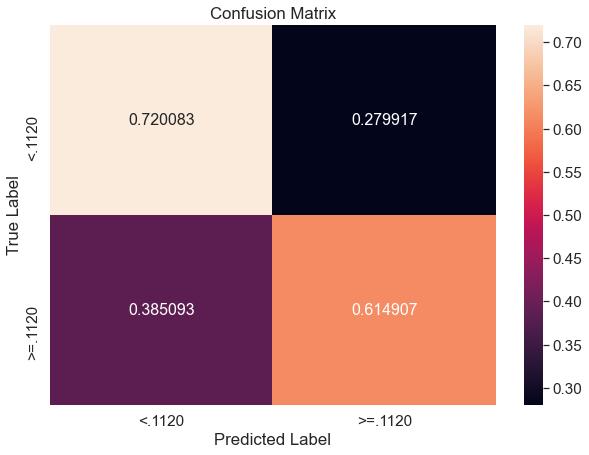

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


RF_pred = cross_val_predict(RF_reg, X2, y2, cv = 3)

cf_matrix = confusion_matrix(y2,RF_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "<.1120", 1: ">=.1120"})
df_cm.index = ["<.1120", ">=.1120"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Discussion Questions 

Bias-Variance Tradeoff

The bias-variance tradeoff is a particularly important dimension because, as discussed above in our justification for our selection of models, some models trade variance for bias and some models trade bias for variance. In the machine learing context, variance refers to how much the estimated outcome will change from sensitivity to fluctuations in the training set. In other words, how much does the outcome fluctuate. The bias stems from the assumptions made about the about the target function in the training process. In other words, bias is introduced when there is limited flexibility in learning the true target function in a dataset. In an ML context, we want to be able to model our data and do so with a model that reduces both of these errors, in the above examples we include model that try to account for both of these biases. 

In terms of choosing the best model, we selected the best model by seeing how each model performed in terms of its RMSE. We are able to compare each model to each other in terms of their RMSE because each of the 5 models we used made use of extended versions of Ordinary Least Squares with more flexible conditions. With these regualirization methods, we are basically able to extend OLS by imposing constraints on the coefficients. 


Overfitting is the process of training your model really well in a way that's specific to your training data but that ultimately results in not being able to effectively predict outcomes on test data. The textbook points to the fact that part of the issue stems from following the errors (or the noise) too closely. 

Analysis: 

For regression models in Machine Learning, the RMSE is a great way to estimate and compare the performance of different learning models. Against our expectations, we found that the random forest model had the lowest RMSE among all the models that we used. Lasso, Elastic Net, and Ridge Regression performed relatively well in terms of having a low RMSE using the same training data. OLS did arguably the worst in prediction. As an initial step in our analysis, we decided that it would make sense to divy up the number of people with diabetes by the total population. Conveniently, we found that in the Census data, race_total_population gives you the same number for the total population. 

From our random forest perspective, we can have a pretty good idea that white folks (feature 7) are likely to be represented in terms of accounting a large part of the diabetes proportion in a county. From this same model, we find that features 30 and 36 are among the top three most important. Feature 30 corresponds to folks who identify as both Asian and white and feature 36 corresponds to people who identify as Asian. Identifying or coming up with critical explanations of why this is the case would be an important next step. The fourth mose important feature was feature 1, which corresponds to physical_inactivity_number, which makes sense in a diabetes context that having diabetes and being physical inactive are correlated. 

In our cross-validation analysis, it seems like the test data and the training data performed well or well enough to be considered decent ways to model this data. In fact, the RMSE on the training data for Random Forest trees is actually smaller than what it was on the training data. We think that this is promising. Althought the data seems to fit a general linear there is some spread between the actual and predicted values that give us pause in considering this an effective model for mapping out patterns in the real world. Thus, we are uncertain that this would be a good assessment for policymakers to use and would prefer to make sure we can cross-validate by looking at literature that asesses these sorts of problems. 